<div>
    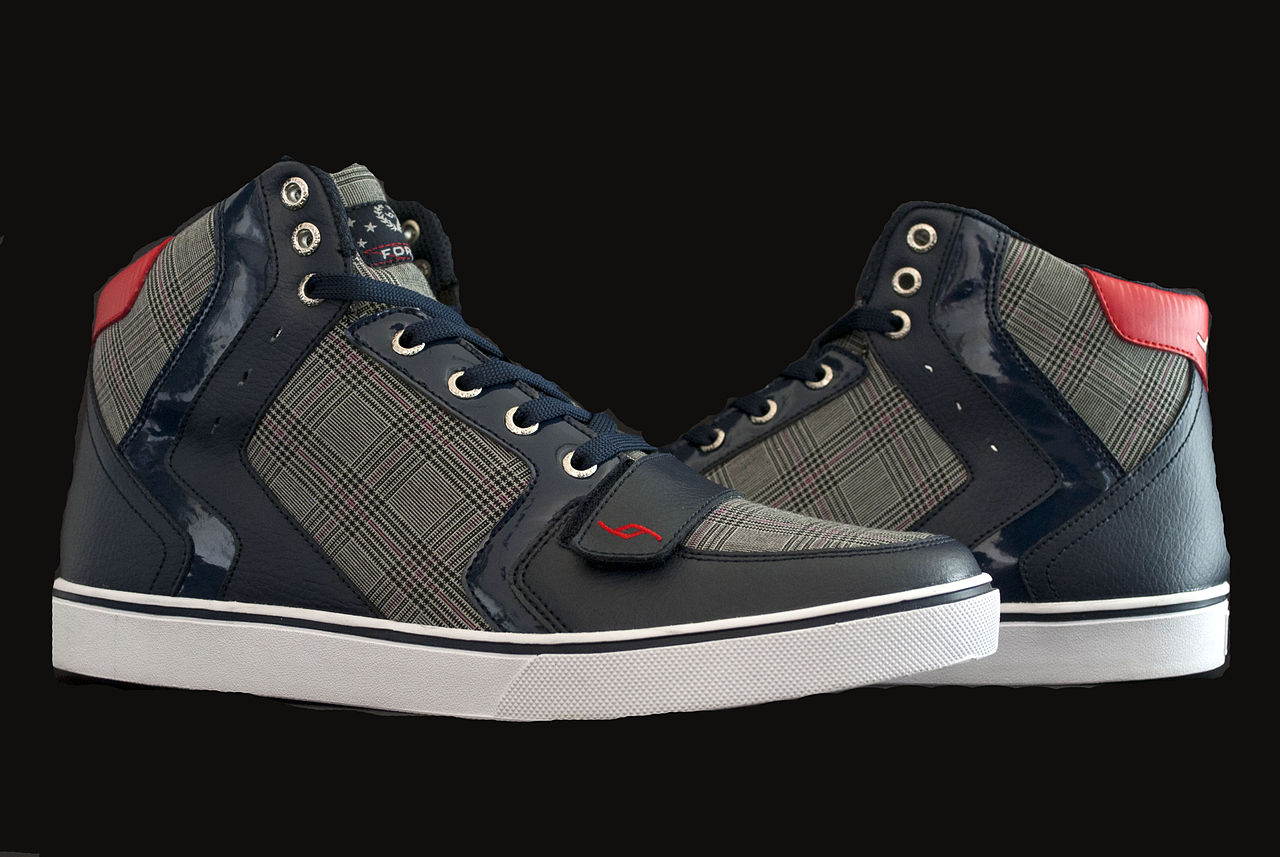
</div>

# Shoes Data Analysis
### - Ronn Kurien

##### Reference: https://www.kaggle.com/lizakonopelko/shoes-reviews-eda-sentiment-analysis

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('Shoes_Data.csv')
df.head()

title    price  \
0    CLYMB Outdoor Sports Running Shoes for Mens Boy  ₹279.00   
1              Bourge Men's Loire-z126 Running Shoes  ₹479.00   
2                               T-Rock Men's Sneaker  ₹430.00   
3  Robbie jones Sneakers Casual Canvas Fabric Col...  ₹499.00   
4                       Sparx Men's Sd0323g Sneakers  ₹499.00   

               rating  total_reviews  \
0  2.9 out of 5 stars   2389 ratings   
1  3.9 out of 5 stars  11520 ratings   
2  3.3 out of 5 stars   1251 ratings   
3  4.2 out of 5 stars      3 ratings   
4  4.2 out of 5 stars  20110 ratings   

                                 product_description  \
0  Elevate your style with this classy pair of Ru...   
1  The product will be an excellent pick for you....   
2  Flaunt with these stylish and unique red casua...   
3  Robbie Jones Shoes Are Designed To Keeping In ...   
4  Sparx is a spectacular range of footwear from ...   

                                             reviews  \
0  Not happy with product|| It's not as expected....   
1  Memory cushioning in these shoes is the best f...   
2  Worth to its amount|| Go for it|| Perfect|| 5 ...   
3  Sup quality|| Good but not expected|| Awesome 👌.!   
4  Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...   

                                      reviews_rating Shoe Type  
0  1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...       Men  
1  5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...       Men  
2  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men  
3  5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...       Men  
4  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men

## Filtering the columns and reviews

In [14]:
shoes = df[['reviews','reviews_rating']]
shoes.head()

reviews  \
0  Not happy with product|| It's not as expected....   
1  Memory cushioning in these shoes is the best f...   
2  Worth to its amount|| Go for it|| Perfect|| 5 ...   
3  Sup quality|| Good but not expected|| Awesome 👌.!   
4  Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...   

                                      reviews_rating  
0  1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...  
1  5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...  
2  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...  
3  5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...  
4  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...

In [15]:
rev = []
rat = []

for j in shoes.index:
    lst = [i for i in shoes.iloc[j].reviews.split('||')]
    for k in lst:
        rev.append(k)
        
for j in shoes.index:
    lst = [i for i in shoes.iloc[j].reviews_rating.split('||')]
    for k in lst:
        rat.append(k)
        
shoes = pd.DataFrame(list(zip(rev, rat)),
               columns =['Review', 'Review_rating'])

In [16]:
shoes.head()

Review        Review_rating
0                             Not happy with product   1.0 out of 5 stars
1                              It's not as expected.   1.0 out of 5 stars
2                                    AVERAGE PRODUCT   3.0 out of 5 stars
3                                 Pic more beautiful   3.0 out of 5 stars
4   Got damage product. But quality is average fo...   3.0 out of 5 stars

In [17]:
# Getting all unique symbols in text
all_text = str()
for sentence in shoes['Review'].values:
    all_text += sentence
''.join(set(all_text))

'🏼9रkn?.य😋☺💖h🔥ட *📦N😇T3ह1"😍😞🤮💪💕md«்सிुJi😒@GpRx🥰ு☹(ल🇨⇢💯👌🇪M❤🏃-+Q💚👇😭»#!😄✔gc%8😤t7🇮।👟ई\'छैIगPदs🤨♂Z्😶v\u200dS_️🤑w🥾ढ💸rप🤫🌹👞l☑:टu✌ளझHDं😡BW🙂😌/इj0oa😊ामजY’🖤💥z₹E✊y😀💋ीKX😎ू2ब😂q⭐🤩🇳தß❣ப❌Oक😁😟उख🌟)A😔4वUन👎😃ॉचeआ🤟😅🏻👏🤣b=C6&ो…V💰अF|🙄😢ेड👍😑ित😉🤘😠fL🤎😘🤙😐🦶5'

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

#Set of stopwords to remove
stop = set(stop)

#Set of punctuation signs to remove
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAZOR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
import re

def lower(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punctuation))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

# Removing all words with digits and standalone digits
def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing all non-printable symbols like "ड", "ட"
def remove_non_printable(text):
    text = text.encode("ascii", "ignore")
    return text.decode()
        
# One function to clean it all
def clean_text(text):
    text = lower(text)
    text = remove_punctuation(text)
    #text = remove_stopwords(text)
    text = remove_digits(text)
    text = remove_emoji(text)
    text = remove_non_printable(text)
    return text

In [20]:
#Returns only one digit from review rating column
def get_first_digit(text):
    match = re.search(r'\d', text)
    return match[0]

In [21]:
#Applying all formatting functions
shoes['Review_rating'] = shoes['Review_rating'].apply(get_first_digit)
shoes['clean_review'] = shoes['Review'].apply(clean_text)
shoes.head()

Review Review_rating  \
0                             Not happy with product             1   
1                              It's not as expected.             1   
2                                    AVERAGE PRODUCT             3   
3                                 Pic more beautiful             3   
4   Got damage product. But quality is average fo...             3   

                                      clean_review  
0                           not happy with product  
1                              its not as expected  
2                                  average product  
3                               pic more beautiful  
4   got damage product but quality is average for

### Most frequent reviews

In [22]:
shoes["clean_review"].value_counts()

 verified purchase                          647
 report abuse                               418
 good                                       280
 good product                               151
 nice                                       118
                                           ... 
 product dammag                               1
 quality must be maintained as per price      1
 qlity bakwaas                                1
its very good                                 1
seems fake                                    1
Name: clean_review, Length: 4711, dtype: int64

In [23]:
#Removing REPORT ABUSE and VERIFIED PURCHASE as they are autogenerated
shoes = shoes[~shoes.Review.str.contains("Report abuse")]
shoes = shoes[~shoes.Review.str.contains("Verified")]
shoes["clean_review"].value_counts()

 good                                       280
 good product                               151
 nice                                       118
 value for money                             94
 nice product                                64
                                           ... 
 product quantity is poor                     1
 product dammag                               1
 quality must be maintained as per price      1
 qlity bakwaas                                1
 sub standard quality                         1
Name: clean_review, Length: 4706, dtype: int64

### Generating Word Clouds for each rating

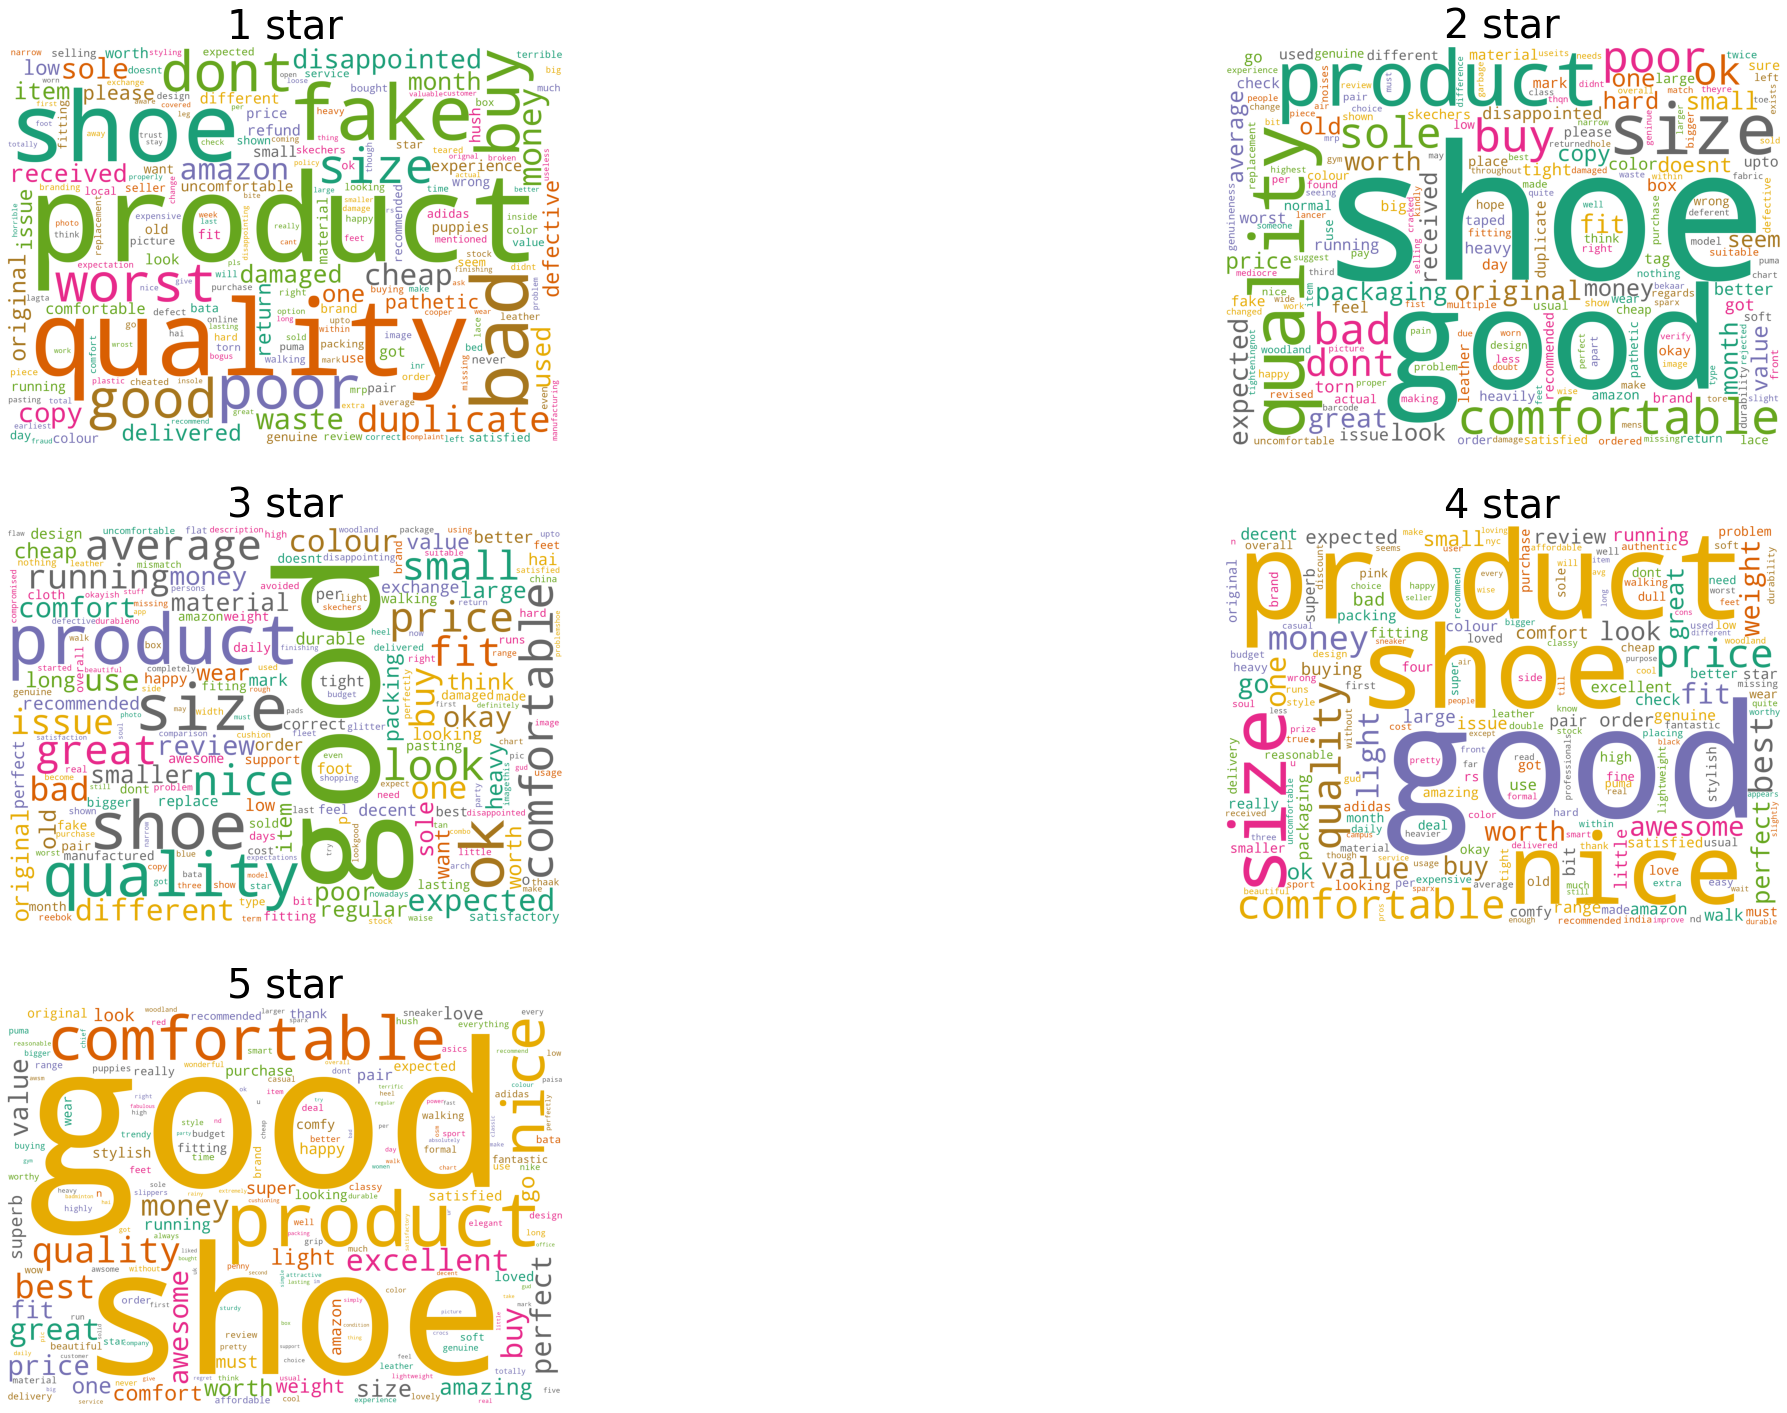

In [24]:
from wordcloud import WordCloud

plt.figure(figsize=(40,25))

subset1 = shoes[shoes['Review_rating']=='1']
text = subset1.clean_review.values
cloud1=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 1)
plt.axis('off')
plt.title("1 star",fontsize=40)
plt.imshow(cloud1)

subset2 = shoes[shoes['Review_rating']=='2']
text = subset2.clean_review.values
cloud2=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 2)
plt.axis('off')
plt.title("2 star",fontsize=40)
plt.imshow(cloud2)

subset3 = shoes[shoes['Review_rating']=='3']
text = subset3.clean_review.values
cloud3=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 3)
plt.axis('off')
plt.title("3 star",fontsize=40)
plt.imshow(cloud3)

subset4 = shoes[shoes['Review_rating']=='4']
text = subset4.clean_review.values
cloud4=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 4)
plt.axis('off')
plt.title("4 star",fontsize=40)
plt.imshow(cloud4)

subset5 = shoes[shoes['Review_rating']=='5']
text = subset5.clean_review.values
cloud5=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 5)
plt.axis('off')
plt.title("5 star",fontsize=40)
plt.imshow(cloud5)

### Performing sentiment analysis on the text

In [25]:
sia = SentimentIntensityAnalyzer()

sentiments = []

for sentence in shoes['clean_review'].values:
    sentiments.append(max(sia.polarity_scores(sentence), key=sia.polarity_scores(sentence).get))

In [26]:
shoes["Sentiment"] = sentiments
shoes.head()

Review Review_rating  \
0                             Not happy with product             1   
1                              It's not as expected.             1   
2                                    AVERAGE PRODUCT             3   
3                                 Pic more beautiful             3   
4   Got damage product. But quality is average fo...             3   

                                      clean_review Sentiment  
0                           not happy with product       neg  
1                              its not as expected       neu  
2                                  average product       neu  
3                               pic more beautiful       pos  
4   got damage product but quality is average for        neu

### Length and Word counts for each rating

In [27]:
shoes['review_len'] = shoes['clean_review'].astype(str).apply(len)
shoes['review_word_count'] = shoes['clean_review'].apply(lambda x: len(str(x).split()))
shoes.head()

Review Review_rating  \
0                             Not happy with product             1   
1                              It's not as expected.             1   
2                                    AVERAGE PRODUCT             3   
3                                 Pic more beautiful             3   
4   Got damage product. But quality is average fo...             3   

                                      clean_review Sentiment  review_len  \
0                           not happy with product       neg          22   
1                              its not as expected       neu          20   
2                                  average product       neu          16   
3                               pic more beautiful       pos          19   
4   got damage product but quality is average for        neu          47   

   review_word_count  
0                  4  
1                  4  
2                  2  
3                  3  
4                  8

### Creating N grams

In [28]:
#Plotly generates interactive graphs
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=False)

In [31]:
#We need cufflinks to link plotly to pandas and add the iplot method
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, offline = False, theme='pearl')

In [32]:
one = shoes[shoes['Review_rating']=='1']
two = shoes[shoes['Review_rating']=='2']
three = shoes[shoes['Review_rating']=='3']
four = shoes[shoes['Review_rating']=='4']
five = shoes[shoes['Review_rating']=='5']

In [33]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### Unigrams

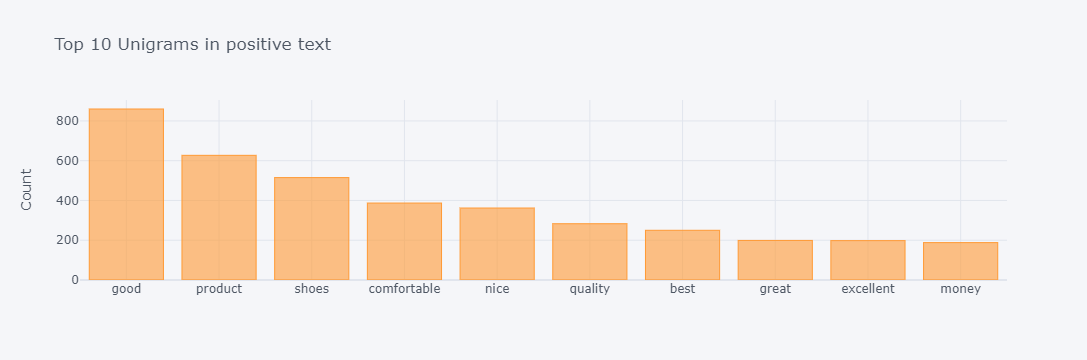

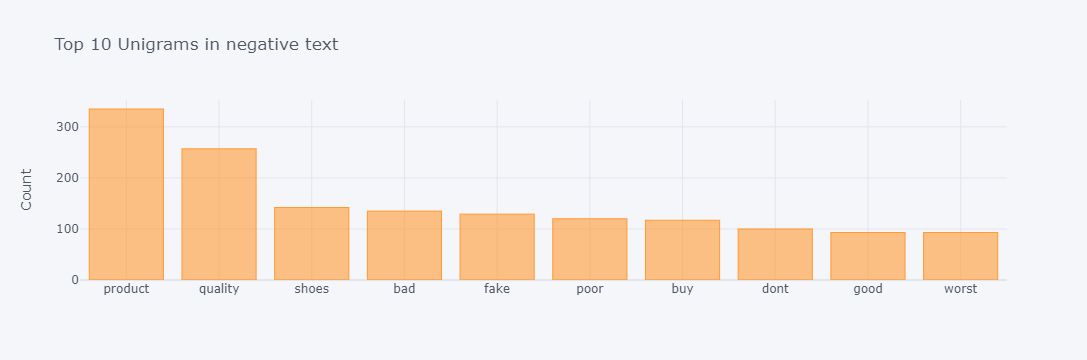

In [40]:
pos_unigrams = get_top_n_gram(five['clean_review'],(1,1),10)
neg_unigrams = get_top_n_gram(one['clean_review'],(1,1),10)


shoes_pos = pd.DataFrame(pos_unigrams, columns = ['Text' , 'count'])
shoes_pos.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', title='Top 10 Unigrams in positive text')

shoes_neg = pd.DataFrame(neg_unigrams, columns = ['Text' , 'count'])
shoes_neg.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', title='Top 10 Unigrams in negative text')

### Bigrams

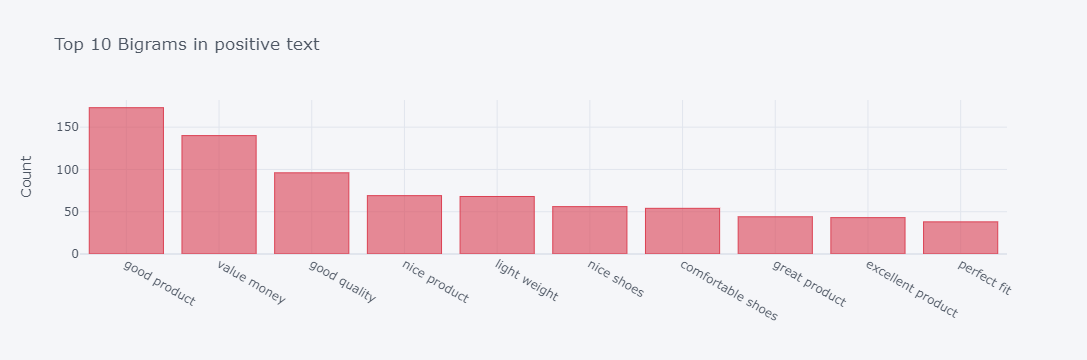

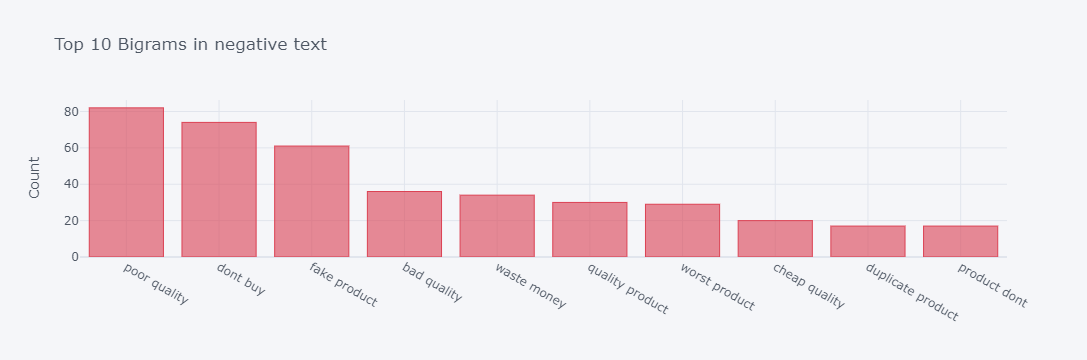

In [41]:
pos_bigrams = get_top_n_gram(five['clean_review'],(2,2),10)
neg_bigrams = get_top_n_gram(one['clean_review'],(2,2),10)


shoes_pos = pd.DataFrame(pos_bigrams, columns = ['Text' , 'count'])
shoes_pos.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', color='red', title='Top 10 Bigrams in positive text')

shoes_neg = pd.DataFrame(neg_bigrams, columns = ['Text' , 'count'])
shoes_neg.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', color='red',title='Top 10 Bigrams in negative text')